In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fn = 'data/data_2d_gm.csv'
dim = 2
data = np.loadtxt(open(fn, "rb"), delimiter=",", skiprows=1)
x = data[:,0:dim]
p = data[:,dim]
h = data[:,dim+1]
n_samples = len(x)

In [7]:
from  sklearn.cluster import KMeans

In [10]:
km = KMeans(n_clusters=40)

In [11]:
group = km.fit_predict(x)

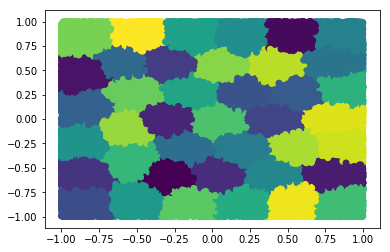

In [17]:
plt.scatter(x[:,0], x[:,1], c = group)

In [18]:
with open('data/2d_gm_for_ihw.csv', 'w') as f:
    f.write('x_value, p_value, h\n')
    for i in range(len(x)):
        f.write("{}, {}, {}\n".format(group[i],p[i], h[i]))

In [21]:
weights = np.loadtxt(open('archive/ihw2dgmweights.csv', "rb"), delimiter=",", skiprows=1, usecols=(1,2,3,4,5))

In [22]:
x_grid = np.arange(-1, 1, 1/100.0)
y_grid = np.arange(-1, 1, 1/100.0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

In [23]:
input = np.concatenate([np.expand_dims(X_grid.flatten(),1), np.expand_dims(Y_grid.flatten(),1)],1).astype(np.float32)

In [26]:
group2 = km.predict(input)

In [28]:
w = weights.mean(axis = 1)

In [30]:
wg = w[group2]

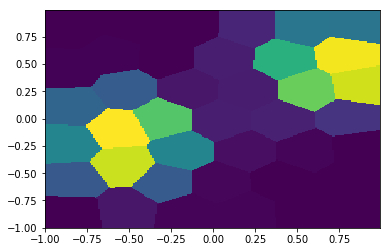

In [33]:
plt.pcolor(X_grid, Y_grid, wg.reshape(200,200))

In [36]:
np.savetxt('ihw_wg.txt', wg)